In [172]:
import matplotlib.pyplot as plt
import autograd.numpy as np
from matplotlib import cm
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial
import math

%matplotlib inline

# 1. illustrate the loss function and Creat a 3D plot

In [184]:

def loss_fun(in_x, in_y):
    y= Symbol('y')
    x= Symbol('x')

    a = 20
    b = 0.2
    c = 2*pi
    d = 2
    
    function = (-a * exp(-b * ((x**2 + y**2)/d)*0.5 )) + a + exp(1) + (-exp((cos(c*x) + cos(c*y)) / d))
    return function.evalf(subs={x: in_x, y: in_y})

In [185]:
def plot_ackley_3d():
    
    fig= plt.figure(figsize=(10,6))
    ax=fig.gca(projection='3d')

    x = np.arange(-32.768, 32.768, 0.25)
    y = np.arange(-32.768, 32.768, 0.25) 
    x,y= np.meshgrid(x,y)

    a=20
    b=0.2
    c= 2*(np.pi)
    d=2

    firstTerm = -a * np.exp(-b * np.sqrt(x*x + y*y) / d)
    secondTerm =-np.exp((np.cos(c*x) + np.cos(c*y)) / d)
    z=a+np.exp(1)+firstTerm+ secondTerm
    
    # Plot the surface. 
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False) 
 
 
     # Add a color bar which maps values to colors. 
    fig.colorbar(surf, shrink=0.5, aspect=5) 
    plt.xlabel('X')
    plt.ylabel('Y')

 
    plt.show() 

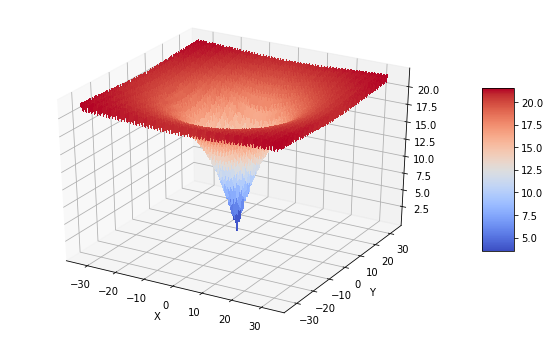

In [186]:
plot_ackley_3d()

# 2. Estimate the local minimum

In [187]:
###Multivariable gradient descent (Plain vanilla implementation) ###########
## This function return the path of the walk from the starting point to the identified minima point.
## If max_iteration reached before reaching any solution, it would return None.
def minimise_fun(start_x, start_y, learn_rate, level_accuracy=3, max_iteration = 1000):
    y= Symbol('y')
    x= Symbol('x')

    a = 20
    b = 0.2
    c = 2*pi
    d = 2
    function = (-a * exp(-b * ((x**2 + y**2)/d)*0.5 )) + a + exp(1) + (-exp((cos(c*x) + cos(c*y)) / d))
    p_dfdx = diff(function, x)
    p_dfdy = diff(function, y)
    
    # threshold derived from the level_accuracy ensure us the coordinate returned by this function will have 
    # maximum of threshold error from the true value
    threshold = 10**(-1*int(level_accuracy))
    result = [[start_x, start_y]]
    
    iteration = 0
    test_x = start_x
    test_y = start_y
    print("We are starting at x=" + str(start_x) + ", y=" + str(start_y))

    while(iteration != max_iteration):
        
        prev_x = test_x
        prev_y = test_y
        
        test_x = test_x - learn_rate * p_dfdx.evalf(subs={x:test_x, y: test_y})
        test_y = test_y - learn_rate * p_dfdy.evalf(subs={x:test_x, y: test_y})

        delta_x = abs(prev_x-test_x)
        delta_y = abs(prev_y-test_y)
        iteration = iteration + 1
        result.append([test_x, test_y])
        
        if (delta_x<threshold and delta_y<threshold):
            print("After " + str(iteration) + " iteration(s), we reached the desired minima which "
                 + "lies within the threshold: " + str(threshold) + " with coordinate: ")
            print(round(test_x, level_accuracy), round(test_y, level_accuracy))
            print("With value: " + str(loss_fun(test_x, test_y)))
            return result
            

    print("After reaching " + str(max_iteration) + "(max) iteration, we still have not found a point "
          + "lies within the threshold: " + str(threshold))
    print("Please increase the max_iteration/ increase threshold/ increase learning rate")
    return


In [178]:
subset_a=minimise_fun(start_x=0.5, start_y=0.5, learn_rate=0.01, max_iteration = 1000)
subset_a
steps_a=np.asarray(subset_a).astype(float)
steps_a
path_a=np.array(steps_a).T
path_a.shape



We are starting at x=0.5, y=0.5
After 25 iteration(s), we reached the desired minima which lies within the threshold: 0.001 with coordinate: 
0.001 0.0
With value: 1.69937687527186e-5


(2, 26)

In [163]:
######test different learning rate########
### We would like to check that with different learning rate, how it may affect the max_iteration that we needed 
### for reaching the minima.

for i in range(1,5):
    
    print('Learning rate: ')
    print(10**(-i))
   
    minimise_fun(0.5, 0.5, learn_rate=10**(-i), level_accuracy=i+2, max_iteration = 10000)
 


Learning rate: 
0.1
We are starting at x=0.5, y=0.5
After reaching 10000(max) iteration, we still have not found a point lies within the threshold: 0.001
Please increase the max_iteration/ increase threshold/ increase learning rate
Learning rate: 
0.01
We are starting at x=0.5, y=0.5
After 28 iteration(s), we reached the desired minima which lies within the threshold: 0.0001 with coordinate: 
0.0001 0.0
With value: 1.29201285223608e-7
Learning rate: 
0.001
We are starting at x=0.5, y=0.5
After 293 iteration(s), we reached the desired minima which lies within the threshold: 1e-05 with coordinate: 
0.00016 0.00016
With value: 1.42556221138185e-6
Learning rate: 
0.0001
We are starting at x=0.5, y=0.5
After 2936 iteration(s), we reached the desired minima which lies within the threshold: 1e-06 with coordinate: 
0.000178 0.000178
With value: 1.76130030843388e-6


In [176]:
#########according to the above result, we create a dataframe to show the result#########
data= {'Learning Rate':['0.1','0.01','0.001','0.0001'],
       'Number of steps needed':['not found in 10000 interation',
                                '28','293','2936'],
      'Minima value':['nan','1.29201285223608e-7','1.42556221138185e-6',' 1.76130030843388e-6']}

df=pd.DataFrame(data)
df
####the starting pooint is x=0.5,y=0.5#######

,Learning Rate,Number of steps needed,Minima value
0,0.1,not found in 10000 interation,nan
1,0.01,28,1.29201285223608e-7
2,0.001,293,1.42556221138185e-6
3,0.0001,2936,1.76130030843388e-6


In [188]:
########find the boundary of the starting points to reach the minimum Z (0, 0)#############
# From testing with different starting point, we realised that not all points we tried converge to point Z (0, 0)
# which we identified as the global minima point within the feature space. We deduce that our algorithm may
# lead us to the local minima point instead due to the downside of gradient descent algorithm. Hence, with a naive
# setting, we try to identified the rough boundary where the points within the boundary converge to Z. 

for i in range(10, 100, 10):
    [x, y] = minimise_fun(0, 0 + i/100, 0.001, level_accuracy=4)[-1]
    print(loss_fun(x, y))
    [x, y] = minimise_fun(0 + i/100, 0, 0.001, level_accuracy=4)[-1]
    print(loss_fun(x, y))
######boundary is between x^2+y^2=0.5^2  #############
# We deduce that the boundary should roughly be points satisfying x^2+y^2<=0.5^2. 
# Note, as the function is symmetrical in x and y individually, with the test we had above, we know that
# (-0.5, 0) and (0, -0.5) are both converging to Z as well.

We are starting at x=0, y=0.1
After 73 iteration(s), we reached the desired minima which lies within the threshold: 0.0001 with coordinate: 
0.0 0.0017
With value: 7.77291130145285e-5
7.77291130145285e-5
We are starting at x=0.1, y=0
After 73 iteration(s), we reached the desired minima which lies within the threshold: 0.0001 with coordinate: 
0.0017 0.0
With value: 7.77291130145285e-5
7.77291130145285e-5
We are starting at x=0, y=0.2
After 91 iteration(s), we reached the desired minima which lies within the threshold: 0.0001 with coordinate: 
0.0 0.0016
With value: 7.19032031668172e-5
7.19032031668172e-5
We are starting at x=0.2, y=0
After 91 iteration(s), we reached the desired minima which lies within the threshold: 0.0001 with coordinate: 
0.0016 0.0
With value: 7.19032031668172e-5
7.19032031668172e-5
We are starting at x=0, y=0.3
After 109 iteration(s), we reached the desired minima which lies within the threshold: 0.0001 with coordinate: 
0.0 0.0016
With value: 7.21560942161422e-5

In [179]:
###choose the learn_rate = 0.01#####
subset_a=minimise_fun(start_x=0.5, start_y=0.5, learn_rate=0.01, max_iteration = 1000)
minima_a = np.asarray(subset_a).astype(str).astype(float)[-1]
minima_a

We are starting at x=0.5, y=0.5
After 25 iteration(s), we reached the desired minima which lies within the threshold: 0.001 with coordinate: 
0.001 0.0
With value: 1.69937687527186e-5


array([0.00063338, 0.00045771])

In [99]:
minima_a=minima_a.reshape(-1,1)
minima_a

array([[0.00063338],
       [0.00045771]])

In [65]:
# The second  Multivariable gradient descent
def basic_gradient(boss, start_x, start_y, step_size, max_iteration = 1000):
    iteration = 0
    test_x = start_x
    test_y = start_y
    list_1=[]
    result_min=[]
    
    print('starting proint:')
    print(test_x, test_y)
    
#     print('Steps are :')
    
    while(iteration != max_iteration):
        value_now = boss(test_x, test_y)
        value_one = boss(test_x+step_size, test_y+step_size)
        value_second = boss(test_x+step_size, test_y-step_size)
        value_third = boss(test_x-step_size, test_y+step_size)
        value_forth = boss(test_x-step_size, test_y-step_size)
        
        value_box = [value_now, value_one, value_second, value_third, value_forth]
        min_index = value_box.index(min(value_box))
        
        if(min_index == 0):
            break
        elif(min_index == 1):
            test_x, test_y = test_x+step_size, test_y+step_size
        elif(min_index == 2):
            test_x, test_y = test_x+step_size, test_y-step_size
        elif(min_index == 3):
            test_x, test_y = test_x-step_size, test_y+step_size
        elif(min_index == 4):
            test_x, test_y = test_x-step_size, test_y-step_size
            
#         print(test_x, test_y)
        list_1 += [[test_x, test_y]]
        

    print("The value of the minmia is")
    print(boss(test_x, test_y))
    result_min +=[[boss(test_x, test_y)]]
    return boss(test_x, test_y), list_1
    #return  list_1
    
    

In [189]:
########find the boundary of the starting points to reach the minimum Z#############
for i in range(10, 100, 10):
    x, _ = basic_gradient(loss_fun,0, 0 + i/100,step_size=0.01)
    print(x)
    x, _ = basic_gradient(loss_fun,0 + i/100, 0, step_size=0.01)
    print(x)
# Again, the boundary should roughly be points satisfying x^2+y^2<=0.5^2. 

starting proint:
0 0.1
The value of the minmia is
3.01474597251648e-33
3.01474597251648e-33
starting proint:
0.1 0
The value of the minmia is
3.01474597251648e-33
3.01474597251648e-33
starting proint:
0 0.2
The value of the minmia is
2.71327137526483e-32
2.71327137526483e-32
starting proint:
0.2 0
The value of the minmia is
2.71327137526483e-32
2.71327137526483e-32
starting proint:
0 0.3
The value of the minmia is
5.63087553311134e-31
5.63087553311134e-31
starting proint:
0.3 0
The value of the minmia is
5.63087553311134e-31
5.63087553311134e-31
starting proint:
0 0.4
The value of the minmia is
1.08832329607845e-30
1.08832329607845e-30
starting proint:
0.4 0
The value of the minmia is
1.08832329607845e-30
1.08832329607845e-30
starting proint:
0 0.5
The value of the minmia is
2.65331142758923e-30
2.65331142758923e-30
starting proint:
0.5 0
The value of the minmia is
2.65331142758923e-30
2.65331142758923e-30
starting proint:
0 0.6
The value of the minmia is
0.943055048444039
0.9430550484

In [109]:

steps_b=basic_gradient(loss_fun, start_x=0.5, start_y=0.5, step_size=0.01)


starting proint:
0.5 0.5
The value of the minmia is
3.1086244689504383e-15


In [116]:
steps=steps_b[-1]
steps

[[0.49, 0.49],
 [0.48, 0.48],
 [0.47, 0.47],
 [0.45999999999999996, 0.45999999999999996],
 [0.44999999999999996, 0.44999999999999996],
 [0.43999999999999995, 0.43999999999999995],
 [0.42999999999999994, 0.42999999999999994],
 [0.41999999999999993, 0.41999999999999993],
 [0.4099999999999999, 0.4099999999999999],
 [0.3999999999999999, 0.3999999999999999],
 [0.3899999999999999, 0.3899999999999999],
 [0.3799999999999999, 0.3799999999999999],
 [0.3699999999999999, 0.3699999999999999],
 [0.3599999999999999, 0.3599999999999999],
 [0.34999999999999987, 0.34999999999999987],
 [0.33999999999999986, 0.33999999999999986],
 [0.32999999999999985, 0.32999999999999985],
 [0.31999999999999984, 0.31999999999999984],
 [0.30999999999999983, 0.30999999999999983],
 [0.2999999999999998, 0.2999999999999998],
 [0.2899999999999998, 0.2899999999999998],
 [0.2799999999999998, 0.2799999999999998],
 [0.2699999999999998, 0.2699999999999998],
 [0.2599999999999998, 0.2599999999999998],
 [0.24999999999999978, 0.2499999

In [117]:
path=np.array(steps).T
path.shape

(2, 50)

In [106]:
####the minimum of the Z of basic gradient
minima_b = np.asarray(steps_b[-1]).astype(str).astype(float)
minima_b

array([-3.08780779e-16, -3.08780779e-16])

In [76]:
minima_b=minima_.reshape(-1,1)
minima_b

array([[-3.08780779e-16],
       [-3.08780779e-16]])

# the first gradient descent

[0.5        0.4902469  0.47996568 0.46912246 0.45767381 0.44556377
 0.43271971 0.41904694 0.40442115 0.38867783 0.3715969  0.35288048
 0.3321199  0.30874795 0.28197377 0.25071523 0.21362013 0.16954824
 0.11955897 0.07091676 0.0354679  0.01624185 0.00725178 0.0032201
 0.00142828]


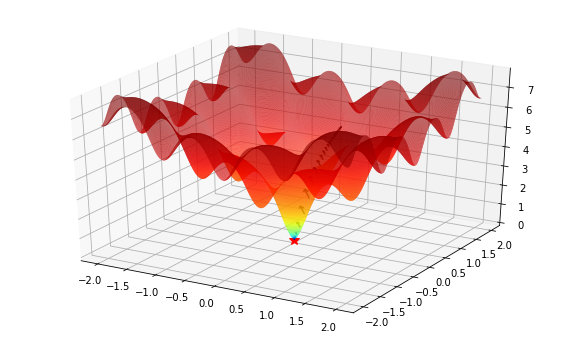

In [136]:
#############the first gradient descent#######
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')

x = np.arange(-2, 2, 0.01)
y = np.arange(-2, 2, 0.01) 
x,y= np.meshgrid(x,y)

a=20
b=0.2
c= 2*(np.pi)
d=2

print(path_a[0,:-1])
ax.quiver(path_a[0,:-1], path_a[1,:-1], loss_fun(*path_a[::,:-1]), 
          path_a[0,1:]-path_a[0,:-1], path_a[1,1:]-path_a[1,:-1], loss_fun(*(path_a[::,1:]-path_a[::,:-1])), 
          color='k')
ax.plot(*minima_a, loss_fun(*minima_a), 'r*', markersize=10)

firstTerm = -a * np.exp(-b * np.sqrt((x*x + y*y)/d) )
secondTerm =-np.exp((np.cos(c*x) + np.cos(c*y)) / d)
z=a+np.exp(1)+firstTerm+ secondTerm

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)

########it only took 26 steps to find the global minimum#######

In [137]:
######create a animation for Multivariable gradient###########
line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def animate(i):
    line.set_data(path_a[0,:i], path_a[1,:i])
    line.set_3d_properties(loss_fun(*path_a[::,:i]))
    point.set_data(path_a[0,i-1:i], path_a[1,i-1:i])
    point.set_3d_properties(loss_fun(*path_a[::,i-1:i]))
    return line, point



In [139]:
anim_a = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path_a.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [140]:
HTML(anim_a.to_html5_video())

# Basic Gradient Descent

[0.49 0.48 0.47 0.46 0.45 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36
 0.35 0.34 0.33 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22
 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08
 0.07 0.06 0.05 0.04 0.03 0.02 0.01]


TypeError: object of type 'numpy.float64' has no len()

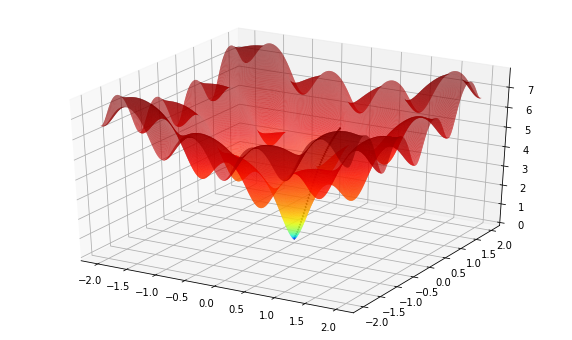

In [118]:
###########basic gradient descent############
#####in order to observe clearly we only plot the limit of x and y is from -2 to 2#############

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')

x = np.arange(-2, 2, 0.01)
y = np.arange(-2, 2, 0.01) 
x,y= np.meshgrid(x,y)

a=20
b=0.2
c= 2*(np.pi)
d=2

    
firstTerm = -a * np.exp(-b * np.sqrt((x*x + y*y)/d) )
secondTerm =-np.exp((np.cos(c*x) + np.cos(c*y)) / d)
z=a+np.exp(1)+firstTerm+ secondTerm

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
print(path[0,:-1])
ax.quiver(path[0,:-1], path[1,:-1], loss_fun(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], loss_fun(*(path[::,1:]-path[::,:-1])), 
          color='k')

ax.plot(*minima_b, loss_fun(*minima_b), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

In [78]:
######create a animation for basic gradient###########
line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(loss_fun(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(loss_fun(*path[::,i-1:i]))
    return line, point

In [79]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)


In [83]:
HTML(anim.to_html5_video())